In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import scipy as sp

from datetime import datetime as dt

In [32]:
dataMovie = pd.read_csv("/Users/featthima/Downloads/archive/movies.csv")
dataRating = pd.read_csv("/Users/featthima/Downloads/archive/ratings.csv")

In [33]:
dataMovie.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [34]:
dataRating.head()

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523


In [35]:
#merge both dataset

df = pd.merge(dataRating, dataMovie, how='inner')
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,16,4.0,1217897793,Casino (1995),Crime|Drama
1,9,16,4.0,842686699,Casino (1995),Crime|Drama
2,12,16,1.5,1144396284,Casino (1995),Crime|Drama
3,24,16,4.0,963468757,Casino (1995),Crime|Drama
4,29,16,3.0,836820223,Casino (1995),Crime|Drama


In [36]:
df.shape

(105339, 6)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105339 entries, 0 to 105338
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     105339 non-null  int64  
 1   movieId    105339 non-null  int64  
 2   rating     105339 non-null  float64
 3   timestamp  105339 non-null  int64  
 4   title      105339 non-null  object 
 5   genres     105339 non-null  object 
dtypes: float64(1), int64(3), object(2)
memory usage: 5.6+ MB


In [38]:
df.describe()

,userId,movieId,rating,timestamp
count,105339.000000,105339.000000,105339.000000,1.053390e+05
mean,364.924539,13381.312477,3.516850,1.130424e+09
std,197.486905,26170.456869,1.044872,1.802660e+08
min,1.000000,1.000000,0.500000,8.285650e+08
25%,192.000000,1073.000000,3.000000,9.711008e+08
50%,383.000000,2497.000000,3.500000,1.115154e+09
75%,557.000000,5991.000000,4.000000,1.275496e+09
max,668.000000,149532.000000,5.000000,1.452405e+09


In [39]:
#Number of Movies in dataset
print(df.title.nunique())

#Number of User in dataset
print(df.userId.nunique())

10323
668


In [40]:
#create movie release years in a new column
df['year'] = df.title.str.extract('.*\((.*)\).*')
df.head()

,userId,movieId,rating,timestamp,title,genres,year
0,1,16,4.0,1217897793,Casino (1995),Crime|Drama,1995
1,9,16,4.0,842686699,Casino (1995),Crime|Drama,1995
2,12,16,1.5,1144396284,Casino (1995),Crime|Drama,1995
3,24,16,4.0,963468757,Casino (1995),Crime|Drama,1995
4,29,16,3.0,836820223,Casino (1995),Crime|Drama,1995


In [41]:
#remove year from title
df['title'] = df.title.str.split('(').str[0].str[:-1]
df.head()

,userId,movieId,rating,timestamp,title,genres,year
0,1,16,4.0,1217897793,Casino,Crime|Drama,1995
1,9,16,4.0,842686699,Casino,Crime|Drama,1995
2,12,16,1.5,1144396284,Casino,Crime|Drama,1995
3,24,16,4.0,963468757,Casino,Crime|Drama,1995
4,29,16,3.0,836820223,Casino,Crime|Drama,1995


In [42]:
def UNIX_to_Readable(df):
    return pd.to_datetime(dt.fromtimestamp(df).strftime('%Y-%m-%d %H:%M:%S'))


# Converting Unix date-format to readable format
df.timestamp = df.timestamp.apply(UNIX_to_Readable)
df.head()

,userId,movieId,rating,timestamp,title,genres,year
0,1,16,4.0,2008-08-05 07:56:33,Casino,Crime|Drama,1995
1,9,16,4.0,1996-09-14 14:38:19,Casino,Crime|Drama,1995
2,12,16,1.5,2006-04-07 14:51:24,Casino,Crime|Drama,1995
3,24,16,4.0,2000-07-13 13:12:37,Casino,Crime|Drama,1995
4,29,16,3.0,1996-07-08 17:03:43,Casino,Crime|Drama,1995


In [43]:
movies_average_rating = df.groupby('title')['rating'].mean().sort_values(ascending=False).reset_index().rename(columns={'rating':'Average Rating'})
movies_average_rating.head()

,title,Average Rating
0,50 Children: The Rescue Mission of Mr. And Mrs...,5.0
1,Sherlock Holmes Faces Death,5.0
2,Ghost in the Shell: Stand Alone Complex - The ...,5.0
3,"Mummy's Hand, The",5.0
4,"Irony of Fate, or Enjoy Your Bath!",5.0


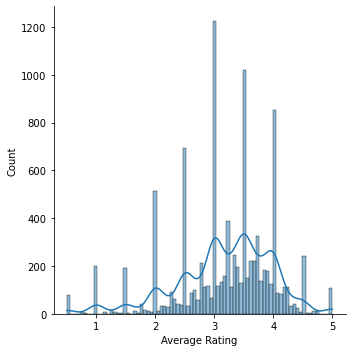

In [44]:
sns.displot(movies_average_rating['Average Rating'], kde=True, bins=80)

In [45]:
movie_rating_count=df.groupby('title')['rating'].count().sort_values(ascending=False).reset_index().rename(columns={'rating':'Rating Count'})
movie_rating_count.head()

,title,Rating Count
0,Pulp Fiction,325
1,Forrest Gump,311
2,"Shawshank Redemption, The",308
3,Jurassic Park,294
4,"Silence of the Lambs, The",290


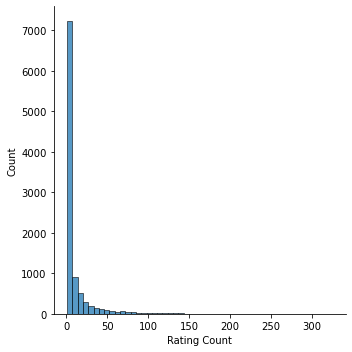

In [50]:
sns.displot(movie_rating_count['Rating Count'], kde=False, bins=50)

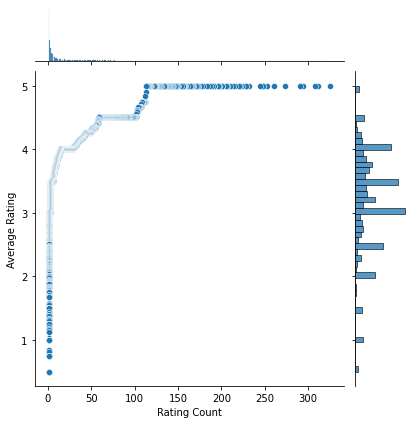

In [75]:
sns.jointplot(x= movie_rating_count['Rating Count'], y=movies_average_rating['Average Rating'], )

In [70]:
#cut off many movie that less reviewer less than 50
movieFrequency_greater_50 = df['movieId'].value_counts()[df['movieId'].value_counts() >= 50].index
df = df[df.movieId.isin(movieFrequency_greater_50)]

In [71]:
#genre value count plot

genres_value_counts = df['genres'].str.split('|', expand=True).stack().value_counts()
fig = px.bar(genres_value_counts, x=genres_value_counts.index, y=genres_value_counts, text=genres_value_counts,
             labels={
                 "index": "Genres",
                 'y': 'Frequency'},
             )
fig.show()

In [72]:
movie_vs_rating = df.groupby(['title', 'rating']).size().unstack().fillna(0)

# calculate the Weighted Average for dataframe rows
def Weighted_Average(df):
    x = []
    for i in range(0, df.shape[0]):
        x.append((np.average(df.iloc[i].index, weights=df.iloc[i].values, axis=0)).round(2))
    return x

# Weighted Average calculation for each movie_vs_rating rows
movie_vs_rating['weightedAverage'] = Weighted_Average(movie_vs_rating)
movie_vs_rating.sort_values('weightedAverage', ascending=False).head()


fig = px.bar(movie_vs_rating, x=movie_vs_rating['weightedAverage'].nlargest(15).index,
             y=movie_vs_rating['weightedAverage'].nlargest(15),
             text=movie_vs_rating['weightedAverage'].nlargest(15),
             labels={
                 "x": "Movies",
                 'y': 'Weighted Rating Averages'},
        
             )
            
fig.show()

In [73]:
user_rating_pt = df.pivot_table(index='userId', columns='title', values='rating').fillna(0)
user_rating_pt

title,10 Things I Hate About You,12 Angry Men,2001: A Space Odyssey,28 Days Later,300,A.I. Artificial Intelligence,"Abyss, The",Ace Ventura: Pet Detective,Ace Ventura: When Nature Calls,Addams Family Values,...,While You Were Sleeping,Who Framed Roger Rabbit?,Wild Wild West,Willy Wonka & the Chocolate Factory,Witness,"Wizard of Oz, The",X-Men,X2: X-Men United,You've Got Mail,Young Frankenstein
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,5.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0
665,0.0,0.0,0.0,0.0,0.0,0.0,3.5,3.0,0.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
666,4.0,5.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,3.0,2.0,0.0,0.0,3.0,4.0,0.0,0.0,0.0


In [74]:
movie_ratings = user_rating_pt['X-Men']
similar_movie = user_rating_pt.corrwith(movie_ratings)
corr=pd.DataFrame(similar_movie, columns=['Correlation'])

corr=corr.join(df.groupby('title')['rating'].count())
corr.rename(columns = {'rating':'Rating Count'}, inplace=True)
mask = corr['Rating Count'] >100
recommendations = corr[mask].sort_values('Correlation', ascending=False)

print(recommendations)



                                                    Correlation  Rating Count
title                                                                        
X-Men                                                  1.000000           130
Spider-Man                                             0.595373           102
Gladiator                                              0.536366           164
Crouching Tiger, Hidden Dragon                         0.483087           112
Lord of the Rings: The Fellowship of the Ring, The     0.475693           189
...                                                         ...           ...
Firm, The                                              0.046725           116
Sleepless in Seattle                                   0.038338           127
Crimson Tide                                           0.023215           107
Net, The                                              -0.000072           105
While You Were Sleeping                               -0.055519 